In [130]:
from nba_api.stats.static import players
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import scipy.stats as stats
plt.style.use('ggplot')

from nba_api.stats.library.parameters import SeasonAll

player_dict = players.get_players()
nba_players = pd.DataFrame.from_dict(player_dict)

# Use ternary operator or write function 
# Names are case sensitive

# find team Ids
from nba_api.stats.static import teams 
teams = teams.get_teams()
nba_teams = pd.DataFrame.from_dict(teams)

In [47]:
def create_dfs(endpoint, start = 1996, end = 2021, season_type = 'Regular Season'):
    
    acc = []
    counter = 0

    for start_year in range(start, end):
        season = '{}-{}'.format(start_year, str(start_year + 1)[2:])
        print(season)
        acc.append(endpoint
                   (per_mode_detailed = 'Totals', 
                    season = season, season_type_all_star = season_type).get_data_frames()[0]
                   [['PLAYER_ID', 'PLAYER_NAME', 'MIN', 'GP', 'W', 'L', 
                                                     'PTS', 'REB', 'AST', 'BLK', 'STL', 'FGM','FGA','FTA', 'PLUS_MINUS']])
        #get totals over the season instead of averages
#         acc[counter]['tot_PTS'] = acc[counter]['PTS'] * acc[counter]['MIN']
#         acc[counter]['tot_REB'] = acc[counter]['REB'] * acc[counter]['MIN']
#         acc[counter]['tot_AST'] = acc[counter]['AST'] * acc[counter]['MIN']
#         acc[counter]['tot_BLK'] = acc[counter]['BLK'] * acc[counter]['MIN']
#         acc[counter]['tot_STL'] = acc[counter]['STL'] * acc[counter]['MIN']
#         acc[counter]['tot_FGM'] = acc[counter]['FGM'] * acc[counter]['MIN']
#         acc[counter]['tot_FGA'] = acc[counter]['FGA'] * acc[counter]['MIN']
#         acc[counter]['tot_FTA'] = acc[counter]['FTA'] * acc[counter]['MIN']
        
        acc[counter]['TSA'] = acc[counter]['FGA'] + (0.44*acc[counter]['FTA'])
        acc[counter]['TS%'] = acc[counter]['PTS'] / (2 * acc[counter]['TSA'])
        acc[counter]['SEASON'] = season
        counter += 1
        time.sleep(1)
        
    return acc

In [22]:
from nba_api.stats.endpoints import leaguedashplayerclutch as clutch

clutch_data = create_dfs(clutch.LeagueDashPlayerClutch)

1996-97
1997-98
1998-99
1999-00
2000-01
2001-02
2002-03
2003-04
2004-05
2005-06
2006-07
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21


In [4]:
clutch_data_playoffs = create_dfs(clutch.LeagueDashPlayerClutch, season_type = 'Playoffs')

1996-97
1997-98
1998-99
1999-00
2000-01
2001-02
2002-03
2003-04
2004-05
2005-06
2006-07
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21


In [48]:
from nba_api.stats.endpoints import leaguedashplayerstats

player_stats = create_dfs(leaguedashplayerstats.LeagueDashPlayerStats)

1996-97
1997-98
1998-99
1999-00
2000-01
2001-02
2002-03
2003-04
2004-05
2005-06
2006-07
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21


In [50]:
player_stats_playoffs = create_dfs(leaguedashplayerstats.LeagueDashPlayerStats, season_type = 'Playoffs')

1996-97
1997-98
1998-99
1999-00
2000-01
2001-02
2002-03
2003-04
2004-05
2005-06
2006-07
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21


In [320]:
def stack_em(lst):
    stacked = pd.concat([lst[0], lst[1]])
    for x in range(2, len(lst)):
        stacked = pd.concat([stacked, lst[x]])
    return stacked

def plot_stats(df1, df2, stat):
    fig, axs = plt.subplots(2, tight_layout = True)
    
    axs[0].hist(df1[stat], bins = 33,)
    axs[0].set_title('Normal')
    
    axs[1].hist(df2[stat], bins = 33, color = 'blue')
    axs[1].set_title('Clutch')
    axs[1].set_xlim(xmin=0, xmax = 5)
    axs[0].set_xlim(xmin=0, xmax=5)
    axs[1].set_ylim(ymin=0, ymax = 200)
    axs[0].set_ylim(ymin=0, ymax=200)
  
    
    fig.suptitle(f"""
    {stat} Averages
    \u03BC (normal): {round(df1[stat].mean(), 2)} \u03C3 (normal): {round(df1[stat].var(),3)}
    \u03BC (clutch): {round(df2[stat].mean(), 2)} \u03C3 (clutch): {round(df2[stat].var(), 3)}""", 
                 y=1, fontsize=15)
   
    
    fig.savefig(f"{stat}_Averages")
    plt.show()

Text(0.5, 1.0, 'hi')

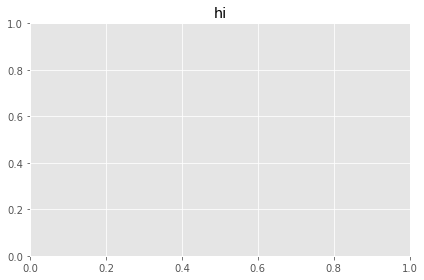

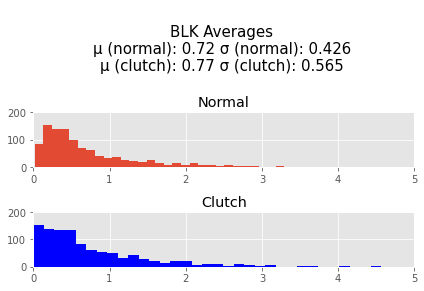

In [319]:
plot_stats(no_scrubs_players_all, no_scrubs_clutch_all, "BLK")

In [213]:
len(no_scrubs_clutch_all)

1064

In [308]:
clutch_data_playoffs[24]

,PLAYER_ID,PLAYER_NAME,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%,SEASON
0,203932,Aaron Gordon,14.748333,3,3,0,2,2,2,1,0,1,1,2,16,1.88,0.531915,2020-21
1,202692,Alec Burks,8.466667,2,1,1,9,0,0,0,0,3,6,2,3,6.88,0.654070,2020-21
2,1627936,Alex Caruso,1.453333,1,1,0,0,0,0,0,0,0,0,0,6,0.00,NaN,2020-21
3,2738,Andre Iguodala,0.621667,1,0,1,0,0,0,0,0,0,0,0,-2,0.00,NaN,2020-21
4,1629014,Anfernee Simons,0.213333,1,0,1,0,0,0,0,0,0,0,0,-4,0.00,NaN,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,203501,Tim Hardaway Jr.,12.001667,4,3,1,13,2,0,0,0,4,7,2,17,7.88,0.824873,2020-21
112,202699,Tobias Harris,6.643333,3,1,2,5,2,0,1,1,2,4,1,-2,4.44,0.563063,2020-21
113,1629027,Trae Young,9.490000,3,2,1,9,2,4,0,0,2,3,5,-1,5.20,0.865385,2020-21
114,2772,Trevor Ariza,10.066667,1,0,1,3,4,1,0,0,1,2,0,-2,2.00,0.750000,2020-21


In [163]:
clutch_data[1].sort_values('REB')

,PLAYER_ID,PLAYER_NAME,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%,SEASON
0,1024,None,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0.00,NaN,1997-98
174,37,Greg Graham,0.170000,1,0,1,0,0,0,0,0,0,0,0,-4,0.00,NaN,1997-98
180,1006,Herb Williams,0.633333,5,1,4,0,0,0,0,0,0,0,0,-7,0.00,NaN,1997-98
183,1024,Horacio Llamas,0.066667,1,1,0,0,0,0,0,0,0,0,0,0,0.00,NaN,1997-98
369,1108,Tony Farmer,2.416667,1,1,0,2,0,0,0,0,0,0,2,-3,0.88,1.136364,1997-98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,238,Tyrone Hill,147.926667,32,16,16,49,49,2,4,3,14,28,30,-15,41.20,0.594660,1997-98
39,183,Bison Dele,189.156667,44,18,26,93,52,3,7,2,37,65,33,-4,79.52,0.584759,1997-98
231,708,Kevin Garnett,202.361667,44,24,20,87,55,13,5,8,28,53,37,6,69.28,0.627887,1997-98
358,1495,Tim Duncan,158.648333,40,27,13,73,60,10,8,3,26,52,31,68,65.64,0.556063,1997-98


In [160]:
len(no_scrubs_players_all)

1064

In [7]:
def aggregate_dfs(dfs):
    stacked = stack_em(dfs)
    grouped = stacked.groupby(['PLAYER_ID', 'PLAYER_NAME'])
    aggregates = grouped.agg(sum)
    #get averages by 36 minutes
    aggregates['PTS'] = aggregates['PTS'] / (aggregates['MIN']/36)
    aggregates['REB'] = aggregates['REB'] / (aggregates['MIN']/36)
    aggregates['AST'] = aggregates['AST'] / (aggregates['MIN']/36)
    aggregates['BLK'] = aggregates['BLK'] / (aggregates['MIN']/36)
    aggregates['STL'] = aggregates['STL'] / (aggregates['MIN']/36)
    aggregates['FGM'] = aggregates['FGM'] / (aggregates['MIN']/36)
    aggregates['FGA'] = aggregates['FGA'] / (aggregates['MIN']/36)
    aggregates['FTA'] = aggregates['FTA'] / (aggregates['MIN']/36)
    aggregates['TSA'] = aggregates['FGA'] + (0.44*aggregates['FTA'])
    aggregates['TS%'] = aggregates['PTS'] / (2 * aggregates['TSA']) 
    
    return aggregates

In [31]:
agg_clutch_data = aggregate_dfs(all_clutch)

In [24]:
all_clutch = clutch_data + clutch_data_playoffs

In [55]:
all_players = player_stats + player_stats_playoffs

50

In [131]:
all_players_stats = player_stats + player_stats_playoffs

In [54]:
agg_player_stats = aggregate_dfs(all_player_stats)

,,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%
PLAYER_ID,PLAYER_NAME,,,,,,,,,,,,,,,
2,Byron Scott,1573.195000,87,58,29,13.203703,2.974838,2.517170,0.366134,1.075518,4.073239,9.427948,3.890173,268,11.139624,0.592646
3,Grant Long,8563.550000,392,171,221,9.147608,6.642105,1.748807,0.319494,1.429314,3.253791,7.575363,3.384111,-478,9.064372,0.504591
7,Dan Schayes,2055.930000,144,73,71,10.313581,6.881557,1.173192,0.910537,0.910537,3.887292,9.525616,3.204389,28,10.935547,0.471562
9,Sedale Threatt,599.093333,37,26,11,7.751714,2.463723,5.287991,0.420636,1.261907,3.004540,7.811805,0.961453,-36,8.234844,0.470665
12,Chris King,40.928333,8,6,2,3.518345,9.675449,0.879586,0.879586,1.759173,1.759173,6.157104,3.518345,-14,7.705176,0.228311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630267,Facundo Campazzo,1655.470000,73,47,26,10.198916,3.522867,5.893190,0.391430,2.000640,3.087945,8.133038,2.392070,40,9.185549,0.555161
1630268,Nate Darling,26.116667,7,3,4,12.405871,1.378430,1.378430,1.378430,0.000000,2.756860,9.649011,4.135290,-30,11.468539,0.540865
1630271,Brodric Thomas,399.270000,32,6,26,11.270569,4.778721,2.704937,0.901646,1.352468,3.516417,9.737771,4.147569,-48,11.562702,0.487367


In [94]:
no_scrubs_clutch_all = agg_clutch_data[agg_clutch_data['MIN'] >= 72]

In [133]:
no_scrubs_players_all =  agg_player_stats.loc[no_scrubs_clutch_all.index]

In [141]:
no_scrubs_players_all.sort_values('STL', ascending = False).head(n=5)

,,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%
PLAYER_ID,PLAYER_NAME,,,,,,,,,,,,,,,
785,Eric Murdock,2731.036667,154,72,82,12.430445,3.941360,5.694541,0.290000,2.478180,4.310451,10.584992,3.980906,-140,12.336590,0.503804
1510,Brevin Knight,18439.718333,743,279,464,10.505367,3.539533,8.832239,0.173755,2.448194,3.965136,9.652208,3.227164,-1111,11.072160,0.474405
2754,Tony Allen,20194.848333,932,550,382,13.052438,5.734730,2.107072,0.684531,2.308510,5.069808,10.731450,3.779182,845,12.394290,0.526550
1627739,Kris Dunn,5564.016667,232,84,148,12.222106,4.962602,6.146639,0.666425,2.283962,4.994953,11.905069,1.941044,-698,12.759128,0.478955
302,Mookie Blaylock,13875.270000,396,181,215,12.848182,4.405536,6.250257,0.262049,2.265037,5.025632,12.645808,1.624185,348,13.360449,0.480829


In [303]:
no_scrubs_clutch_all.sort_values('STL', ascending = False)[['MIN','STL']].head(n=5)

,,MIN,STL
PLAYER_ID,PLAYER_NAME,,
760,Jerome Kersey,124.831667,3.172272
204025,Tim Frazier,116.185000,3.098507
85,Brent Price,74.448333,2.901341
2754,Tony Allen,906.473333,2.740290
71,Pooh Richardson,118.950000,2.723834


In [127]:
from sklearn import preprocessing

def normalize_main_trackers(df_og):
    df = df_og.copy()
    norm_pts = preprocessing.normalize([np.array(df['PTS'])])[0]
    norm_reb = preprocessing.normalize([np.array(df['REB'])])[0]
    norm_ast = preprocessing.normalize([np.array(df['AST'])])[0]
    norm_blk = preprocessing.normalize([np.array(df['BLK'])])[0]
    norm_stl = preprocessing.normalize([np.array(df['STL'])])[0]
    normd = norm_pts + norm_reb + norm_ast + norm_blk + norm_stl
    return pd.Series(normd)
    

    

    

In [128]:
normd_data = normalize_main_trackers(no_scrubs_clutch_all)

In [215]:
normed_players = normalize_main_trackers(no_scrubs_players_all)
normed_clutch = normalize_main_trackers(no_scrubs_clutch_all)

In [305]:
stats.ttest_ind(normed_players, 
                      normed_clutch, 
                      equal_var=False,
                alternative = 'greater')

Ttest_indResult(statistic=3.344791299084701, pvalue=0.0004191896066991753)

In [101]:
norm_pts = preprocessing.normalize([np.array(no_scrubs_clutch_all['PTS'])])
norm_reb = preprocessing.normalize([np.array(no_scrubs_clutch_all['REB'])])

In [122]:
swag = norm_reb[0] + norm_pts[0]

In [123]:
pd.Series(swag)

0       0.053184
1       0.046231
2       0.052924
3       0.064068
4       0.045095
          ...   
1059    0.035564
1060    0.040643
1061    0.067102
1062    0.046089
1063    0.023938
Length: 1064, dtype: float64

In [61]:
no_scrubs_clutch_all['PTS']

PLAYER_ID  PLAYER_NAME      
2          Byron Scott          18.630326
3          Grant Long            9.826440
15         Eric Piatkowski      15.391891
17         Clyde Drexler        15.464174
21         Greg Anthony         13.322916
                                  ...    
1629661    Cameron Johnson       7.591036
1629684    Grant Williams        8.135773
1630162    Anthony Edwards      13.957053
1630169    Tyrese Haliburton    13.766730
1630171    Isaac Okoro           8.050404
Name: PTS, Length: 1064, dtype: float64

In [13]:
agg_clutch_data_all = aggregate_dfs(all_clutch)

In [14]:
agg_clutch_data_all

,,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%
PLAYER_ID,PLAYER_NAME,,,,,,,,,,,,,,,
2,Byron Scott,106.278333,38,26,12,18.630326,3.048599,1.354933,0.338733,1.354933,5.758464,10.161996,5.419731,70,12.546678,0.742441
3,Grant Long,315.068333,118,53,65,9.826440,5.713046,1.371131,0.457044,1.942436,2.742262,6.969917,5.141742,-40,9.232283,0.532178
7,Dan Schayes,49.395000,25,16,9,18.220468,6.559368,0.000000,0.000000,0.000000,4.372912,7.288187,11.661099,-5,12.419071,0.733568
9,Sedale Threatt,9.521667,4,1,3,11.342552,3.780851,7.561701,0.000000,3.780851,3.780851,15.123403,0.000000,0,15.123403,0.375000
15,Eric Piatkowski,514.556667,209,71,138,15.391891,4.547604,1.819042,0.209889,0.839558,4.127825,10.214618,5.806941,-68,12.769672,0.602674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630256,Jae'Sean Tate,53.946667,20,6,14,10.677212,5.338606,2.001977,1.334652,0.667326,3.336629,8.675235,4.003955,-32,10.436975,0.511509
1630264,Anthony Gill,3.563333,3,2,1,0.000000,20.205800,0.000000,0.000000,0.000000,0.000000,10.102900,0.000000,-8,10.102900,0.000000
1630267,Facundo Campazzo,46.136667,16,11,5,5.462033,3.901452,4.681743,0.780290,3.121162,0.780290,3.901452,3.121162,33,5.274763,0.517751


In [12]:
all_clutch = clutch_data + clutch_data_playoffs

In [109]:
type(all_clutch)

list

In [100]:
all_clutch[0]

,PLAYER_ID,PLAYER_NAME,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%,SEASON
0,93,None,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0.00,NaN,1996-97
1,1049,None,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0.00,NaN,1996-97
2,2179,None,7.360000,5,4,1,0,0,0,0,0,0,0,0,8,0.00,NaN,1996-97
3,920,A.C. Green,114.593333,34,11,23,13,23,1,0,2,4,10,8,-63,13.52,0.480769,1996-97
4,243,Aaron McKie,67.591667,25,11,14,10,7,3,3,3,3,9,2,-15,9.88,0.506073,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,335,Willie Anderson,8.503333,5,4,1,4,2,3,0,0,1,2,2,11,2.88,0.694444,1996-97
392,416,Willie Burton,15.055000,6,5,1,2,3,0,0,0,0,3,2,6,3.88,0.257732,1996-97
393,1365,Xavier McDaniel,49.140000,19,9,10,25,13,3,0,0,9,19,8,-7,22.52,0.555062,1996-97
394,212,Yinka Dare,1.978333,2,1,1,0,0,0,0,0,0,0,0,-5,0.00,NaN,1996-97


In [103]:
len(clutch_data_playoffs)

31

In [106]:
clutch_data_playoffs = clutch_data_playoffs[6:]

In [107]:
clutch_data_playoffs[0]

,PLAYER_ID,PLAYER_NAME,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%,SEASON
0,243,Aaron McKie,0.163333,1,0,1,0,0,0,0,0,0,0,0,-2,0.00,NaN,1996-97
1,673,Alan Henderson,0.533333,1,0,1,1,0,0,0,0,0,0,2,1,0.88,0.568182,1996-97
2,275,Allan Houston,14.713333,5,3,2,2,0,0,0,0,1,3,0,7,3.00,0.333333,1996-97
3,297,Alonzo Mourning,24.931667,10,5,5,11,4,1,0,0,3,8,7,3,11.08,0.496390,1996-97
4,358,Anfernee Hardaway,2.038333,2,1,1,1,0,0,1,0,0,1,2,-5,1.88,0.265957,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,895,Tyrone Corbin,10.470000,3,1,2,0,2,1,0,0,0,2,0,1,2.00,0.000000,1996-97
119,124,Vlade Divac,5.585000,2,0,2,0,0,0,1,0,0,0,0,-14,0.00,NaN,1996-97
120,702,Voshon Lenard,21.248333,9,4,5,13,3,0,0,0,3,6,7,7,9.08,0.715859,1996-97
121,445,Wesley Person,8.796667,3,2,1,2,3,1,0,0,0,1,2,3,1.88,0.531915,1996-97


In [130]:
stack_em(clutch_data)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [122]:
clutch_data[0]

,PLAYER_ID,PLAYER_NAME,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%,SEASON
0,93,None,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0.00,NaN,1996-97
1,1049,None,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0.00,NaN,1996-97
2,2179,None,7.360000,5,4,1,0,0,0,0,0,0,0,0,8,0.00,NaN,1996-97
3,920,A.C. Green,114.593333,34,11,23,13,23,1,0,2,4,10,8,-63,13.52,0.480769,1996-97
4,243,Aaron McKie,67.591667,25,11,14,10,7,3,3,3,3,9,2,-15,9.88,0.506073,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,335,Willie Anderson,8.503333,5,4,1,4,2,3,0,0,1,2,2,11,2.88,0.694444,1996-97
392,416,Willie Burton,15.055000,6,5,1,2,3,0,0,0,0,3,2,6,3.88,0.257732,1996-97
393,1365,Xavier McDaniel,49.140000,19,9,10,25,13,3,0,0,9,19,8,-7,22.52,0.555062,1996-97
394,212,Yinka Dare,1.978333,2,1,1,0,0,0,0,0,0,0,0,-5,0.00,NaN,1996-97


In [125]:
swag = pd.concat([clutch_data[0], clutch_data[1]])

In [128]:
swag = pd.concat([swag, clutch_data[2]])

In [129]:
swag

,PLAYER_ID,PLAYER_NAME,MIN,GP,W,L,PTS,REB,AST,BLK,STL,FGM,FGA,FTA,PLUS_MINUS,TSA,TS%,SEASON
0,93,None,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0.00,NaN,1996-97
1,1049,None,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0.00,NaN,1996-97
2,2179,None,7.360000,5,4,1,0,0,0,0,0,0,0,0,8,0.00,NaN,1996-97
3,920,A.C. Green,114.593333,34,11,23,13,23,1,0,2,4,10,8,-63,13.52,0.480769,1996-97
4,243,Aaron McKie,67.591667,25,11,14,10,7,3,3,3,3,9,2,-15,9.88,0.506073,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,962,Walter McCarty,23.056667,6,1,5,6,3,4,0,0,1,4,6,-9,6.64,0.451807,1998-99
362,445,Wesley Person,54.106667,19,10,9,15,7,0,0,0,6,24,5,-7,26.20,0.286260,1998-99
363,781,Will Perdue,0.001667,1,1,0,0,0,0,0,0,0,0,0,0,0.00,NaN,1998-99
364,1061,William Cunningham,0.550000,1,0,1,0,0,0,0,0,0,0,0,0,0.00,NaN,1998-99
